# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Zefandion Benaya Teja]
- **Email:** [zefandion03@gmail.com]
- **ID Dicoding:** [MC232D5Y0662]

## Menentukan Pertanyaan Bisnis

- Pada musim apa orang paling banyak menyewa sepeda?
- Pada jam berapa orang paling banyak menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca file CSV dari Google Drive dan menyimpannya ke dalam DataFrame day_df
day_df = pd.read_csv("/content/drive/MyDrive/DBSDicoding/day.csv")
# Menampilkan 5 baris pertama dari DataFrame day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [83]:
# Membaca file CSV dari Google Drive dan menyimpannya ke dalam DataFrame hour_df
hour_df = pd.read_csv("/content/drive/MyDrive/DBSDicoding/hour.csv")
# Menampilkan 5 baris pertama dari DataFrame hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [84]:
# Mengimpor modul drive dari google.colab untuk mengakses Google Drive
from google.colab import drive
# Mount Google Drive ke direktori /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Assessing Data

In [85]:
# Menampilkan informasi tentang DataFrame day_df, termasuk tipe data dan jumlah nilai non-null
day_df.info()
# Menghitung jumlah nilai null (missing values) di setiap kolom day_df
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [86]:
# Menampilkan jumlah baris yang terduplikasi di day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())
# Menampilkan statistik deskriptif dari day_df (seperti mean, std, min, max, dll.)
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [87]:
# Menampilkan informasi tentang DataFrame hour_df, termasuk tipe data dan jumlah nilai non-null
hour_df.info()
# Menghitung jumlah nilai null (missing values) di setiap kolom hour_df
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [88]:
# Menampilkan jumlah baris yang terduplikasi di hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
# Menampilkan statistik deskriptif dari hour_df (seperti mean, std, min, max, dll.)
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data pada day_df dan hour_df yaitu untuk kolom dteday yang mana seharusnya kolom tersebut merepresentasikan tipe data datetime bukan object.
- Keduanya sama-sama tidak terdapat missing values dan duplikat data

### Cleaning Data

In [89]:
# Mendefinisikan kolom yang akan diubah menjadi tipe data datetime
datetime_columns = ["dteday"]

# Loop untuk mengubah kolom "dteday" di day_df menjadi tipe data datetime
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

# Menampilkan informasi tentang day_df setelah perubahan tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [90]:
# Mendefinisikan kolom yang akan diubah menjadi tipe data datetime
datetime_columns = ["dteday"]

# Loop untuk mengubah kolom "dteday" di hour_df menjadi tipe data datetime
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

# Menampilkan informasi tentang hour_df setelah perubahan tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data dari keduanya sudah diperbaiki

## Exploratory Data Analysis (EDA)

### Explore ...

In [91]:
# Menampilkan statistik deskriptif untuk semua kolom di day_df, termasuk kolom kategorikal
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [92]:
# Menampilkan statistik deskriptif untuk semua kolom di hour_df, termasuk kolom kategorikal
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [96]:
# Mengelompokkan data day_df berdasarkan kolom "season", menghitung jumlah rental sepeda di kolom "cnt", dan mengurutkannya secara menurun
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,188
2,182
1,179
4,176


In [98]:
# Mengelompokkan data hour_df berdasarkan kolom "hr", menghitung jumlah rental sepeda di kolom "cnt", dan mengurutkannya secara menurun
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

,cnt
hr,
17,494
18,471
8,467
19,423
16,414
14,385
15,383
12,383
13,377


**Insight:**
- Melakukan explore data day_df untuk melihat daftar season beserta jumlah rental sepeda pada masing-masing season
- Melakukan explore data hour_df untuk melihat daftar hr(jam) beserta jumlah rental sepeda pada tiap jam

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [101]:
# Lakukan groupby, hitung jumlah rental, dan urutkan
daySeason_df = (
    day_df.groupby(by="season")  # Kelompokkan berdasarkan kolom "season"
    .cnt.nunique()          # Hitung jumlah nilai unik di kolom "cnt"
    .reset_index()              # Ubah hasil groupby menjadi DataFrame
    .rename(columns={"season": "Season", "cnt": "Jumlah_Rental_Sepeda"})  # Ganti nama kolom
)

# Tampilkan 15 baris teratas
daySeason_df.head(15)

,Season,Jumlah_Rental_Sepeda
0,1,179
1,2,182
2,3,188
3,4,176


<ipython-input-105-425dd0b408f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


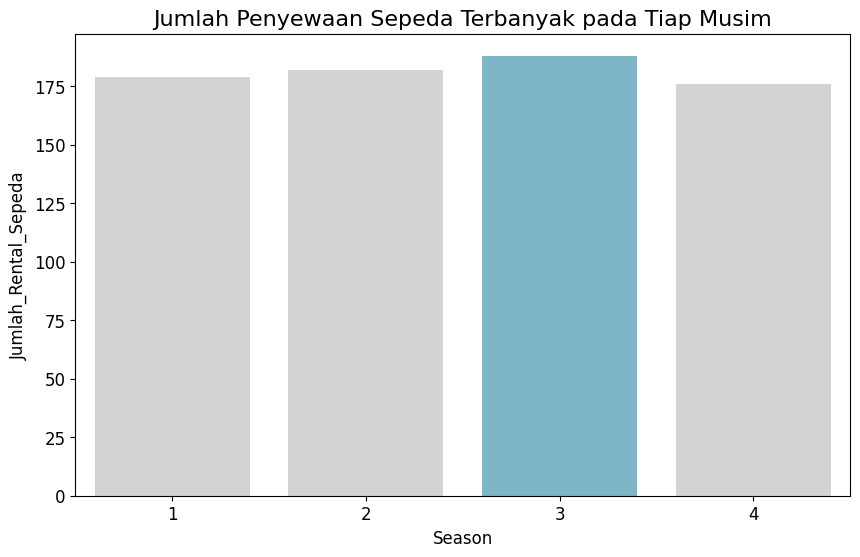

In [105]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# Tentukan warna untuk setiap bar
# Bar dengan jumlah rental terbanyak akan berwarna biru, lainnya abu-abu
colors = ["#72BCD4" if x == daySeason_df["Jumlah_Rental_Sepeda"].max() else "#D3D3D3" for x in daySeason_df["Jumlah_Rental_Sepeda"]]

# Buat barplot
sns.barplot(
    x="Season",  # Sumbu x: season
    y="Jumlah_Rental_Sepeda",  # Sumbu y: jumlah rental sepeda
    data=daySeason_df,  # Data yang digunakan
    palette=colors,  # Warna bar
    ax=ax
)

# Atur label dan judul
ax.set_ylabel("Jumlah_Rental_Sepeda", fontsize=12)
ax.set_xlabel("Season", fontsize=12)
ax.set_title("Jumlah Penyewaan Sepeda Terbanyak pada Tiap Musim", loc="center", fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Tampilkan plot
plt.show()

### Pertanyaan 2:

In [106]:
# Lakukan groupby, hitung jumlah rental, dan urutkan
hourSeason_df = (
    hour_df.groupby(by="hr")  # Kelompokkan berdasarkan kolom "hr" (hour)
    .cnt.nunique()        # Hitung jumlah nilai unik di kolom "cnt"
    .reset_index()            # Ubah hasil groupby menjadi DataFrame
    .rename(columns={"hr": "Hour", "cnt": "Jumlah_Rental_Sepeda"})  # Ganti nama kolom
)

# Tampilkan 15 baris teratas
print(hourSeason_df.head(24))

    Hour  Jumlah_Rental_Sepeda
0      0                   162
1      1                   120
2      2                   100
3      3                    60
4      4                    25
5      5                    58
6      6                   187
7      7                   374
8      8                   467
9      9                   322
10    10                   312
11    11                   337
12    12                   383
13    13                   377
14    14                   385
15    15                   383
16    16                   414
17    17                   494
18    18                   471
19    19                   423
20    20                   360
21    21                   294
22    22                   252
23    23                   196


<ipython-input-107-972b4c658338>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


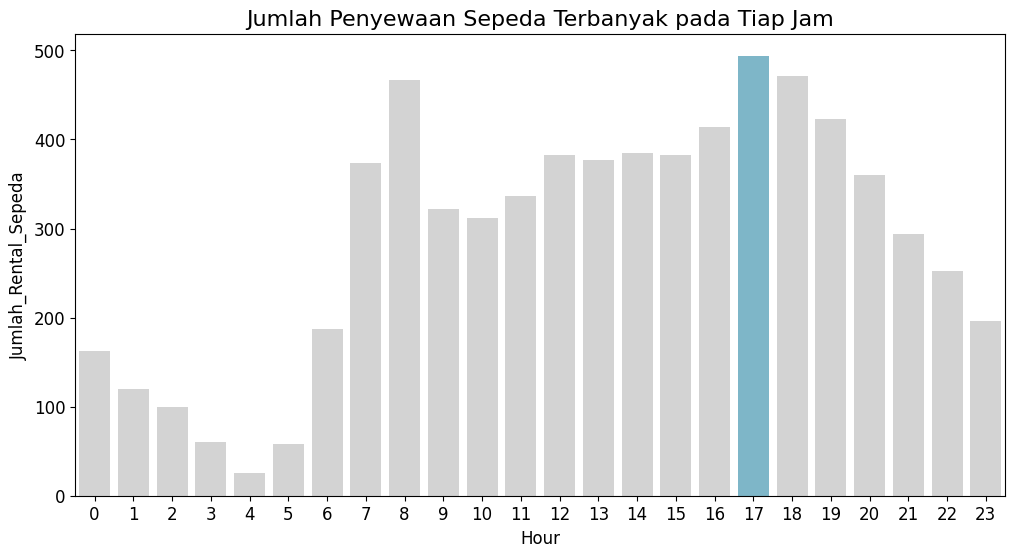

In [107]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(12, 6))

# Tentukan warna untuk setiap bar
# Bar dengan jumlah rental terbanyak akan berwarna biru, lainnya abu-abu
colors = ["#72BCD4" if x == hourSeason_df["Jumlah_Rental_Sepeda"].max() else "#D3D3D3" for x in hourSeason_df["Jumlah_Rental_Sepeda"]]

# Buat barplot
sns.barplot(
    x="Hour",  # Sumbu x: hour
    y="Jumlah_Rental_Sepeda",  # Sumbu y: jumlah rental sepeda
    data=hourSeason_df,  # Data yang digunakan
    palette=colors,  # Warna bar
    ax=ax
)

# Atur label dan judul
ax.set_ylabel("Jumlah_Rental_Sepeda", fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_title("Jumlah Penyewaan Sepeda Terbanyak pada Tiap Jam", loc="center", fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Tampilkan plot
plt.show()

**Insight:**
- Melakukan visualisasi data untuk menjawab pertanyaan 1 dengan cara melakukan groupby, menghitung jumlah penyewaan lalu membuat barplot dari data tersebut.
- Melakukan visualisasi data untuk menjawab pertanyaan 2 dengan cara melakukan groupby, menghitung jumlah penyewaan lalu membuat barplot dari data tersebut.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis data yang sudah dilakukan, didapatkan bahwa season/musim dengan penyewaan sepeda terbanyak berada pada index season ke-3 yaitu "fall" (Musim Gugur) dengan total 188 penyewaan sepeda.
- Berdasarkan analisis data yang telah dilakukan, didapatkan bahwa penyewaan sepeda terbanyak berada di jam 17 dengan total 494 penyewaan sepeda.